## 1.Understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)


In [3]:
bike = pd.read_csv('BoomBikes.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

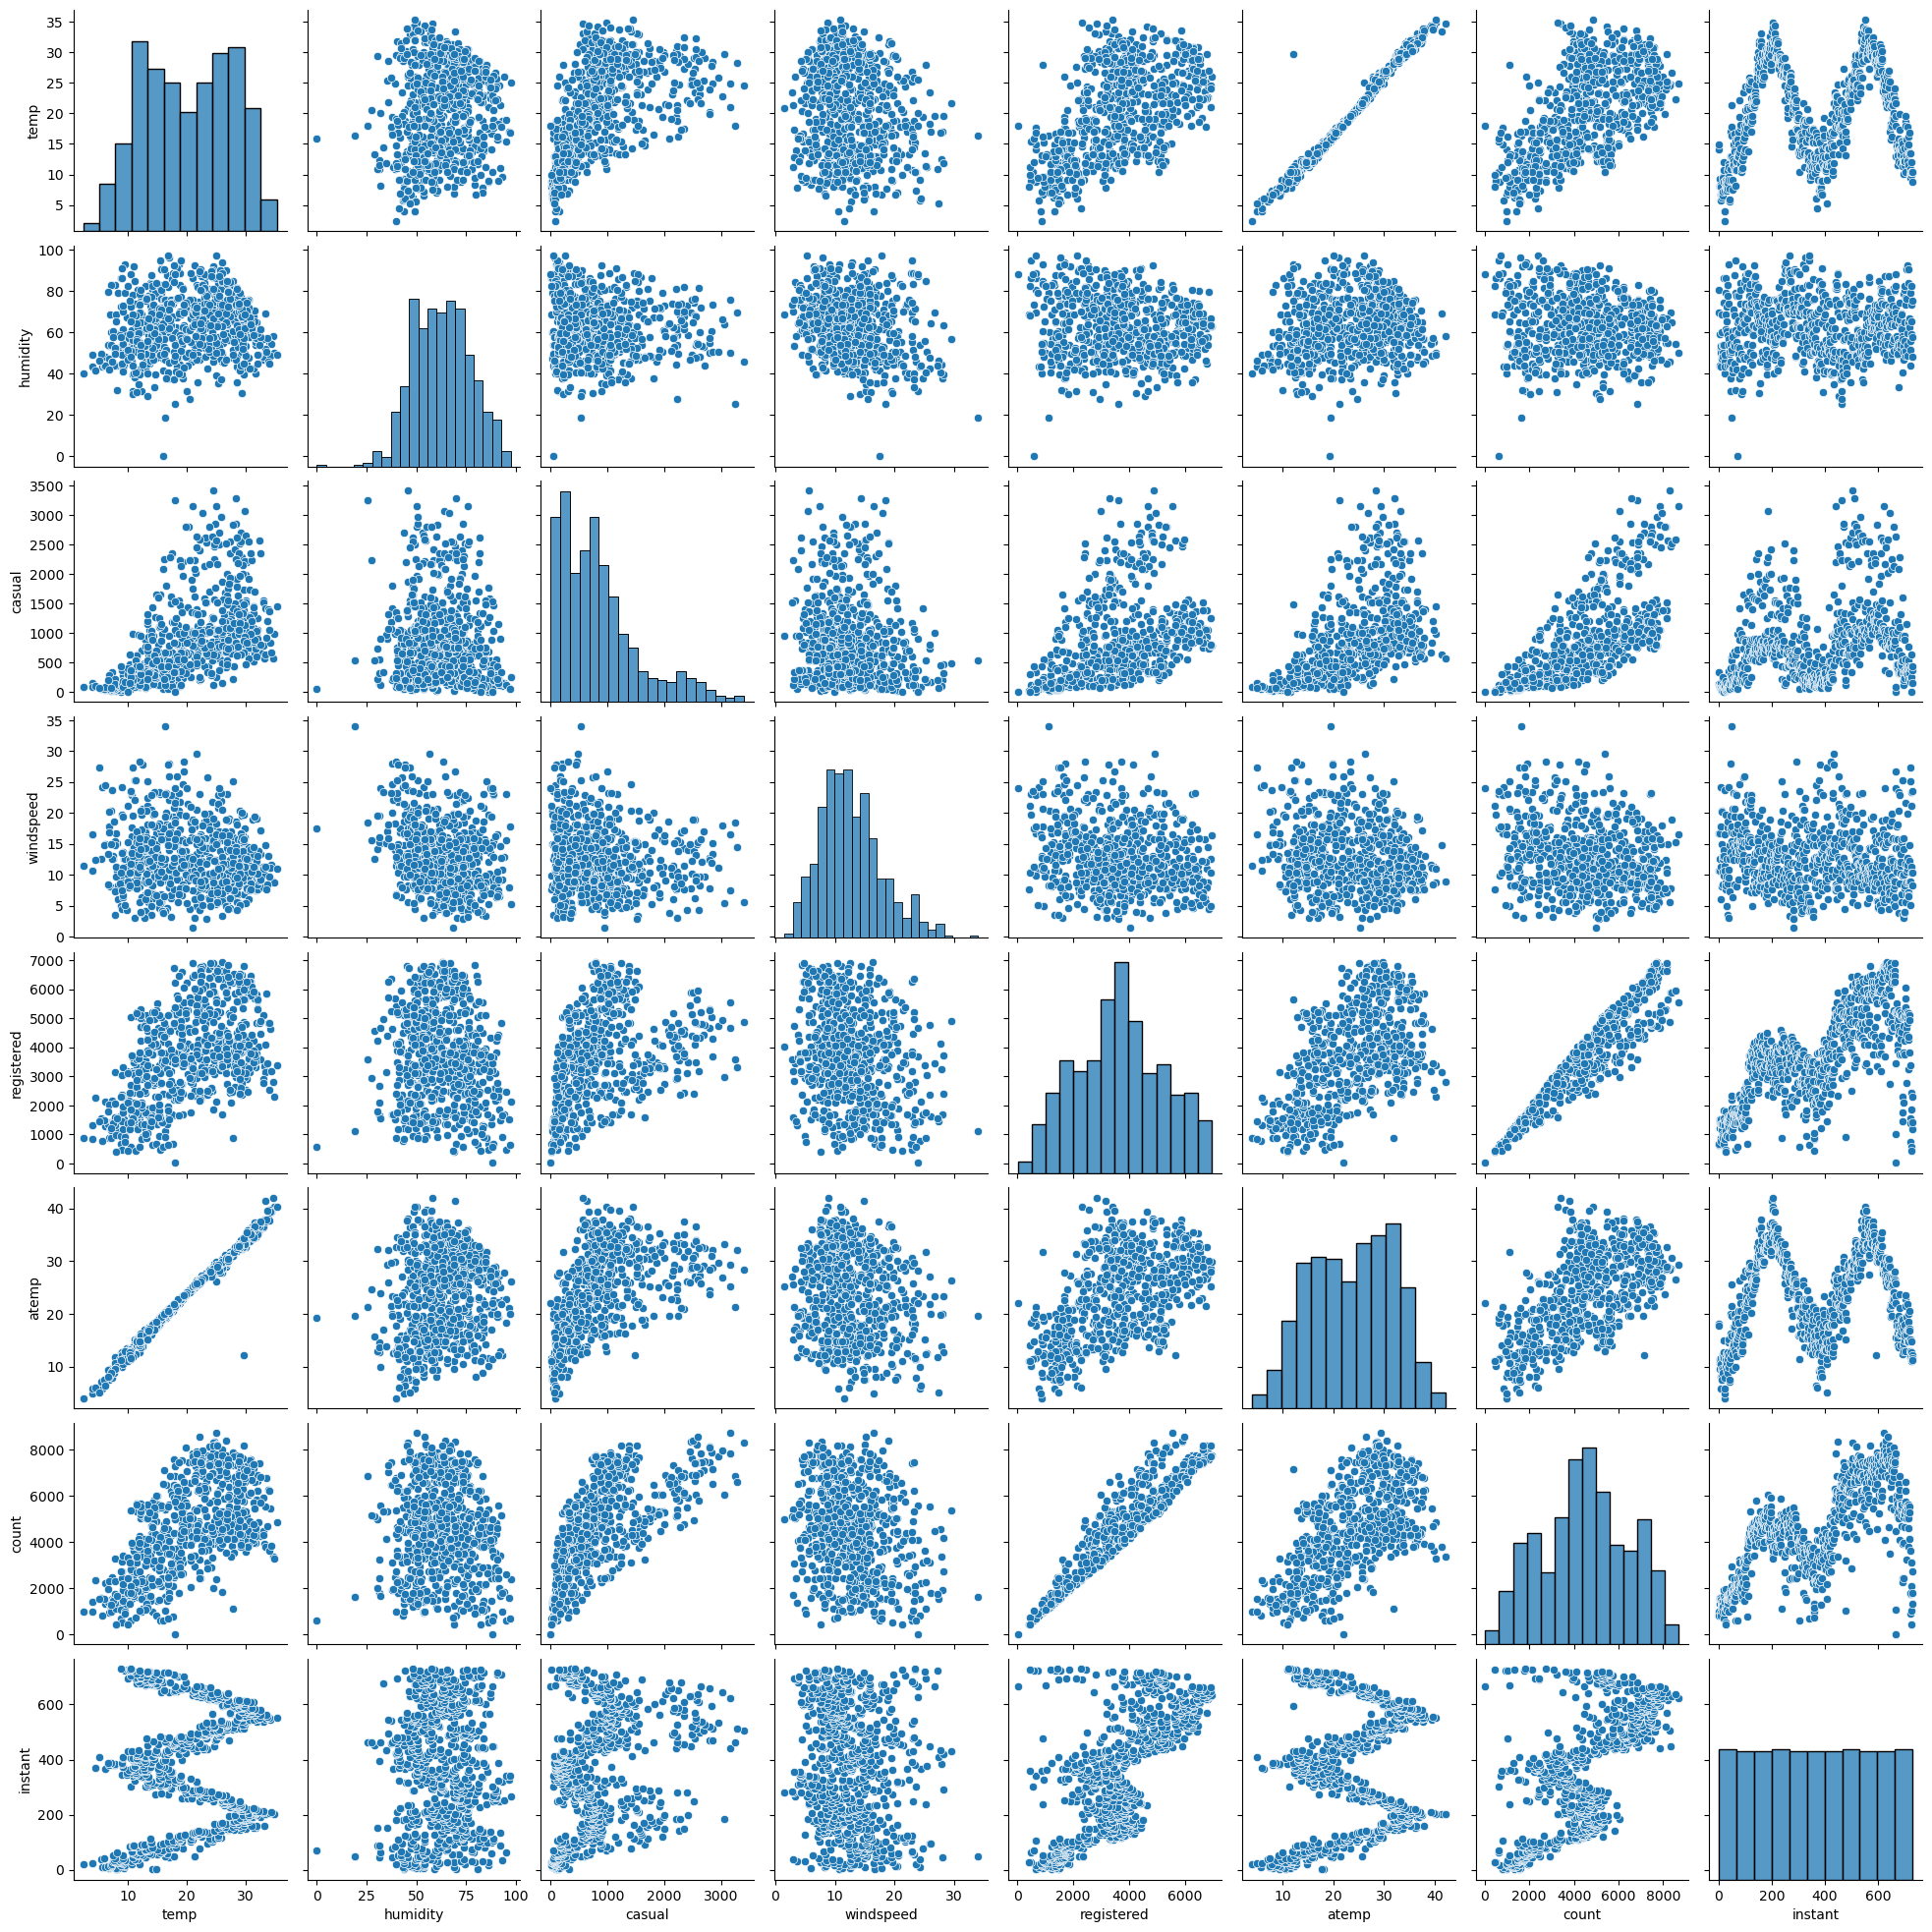

In [12]:
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

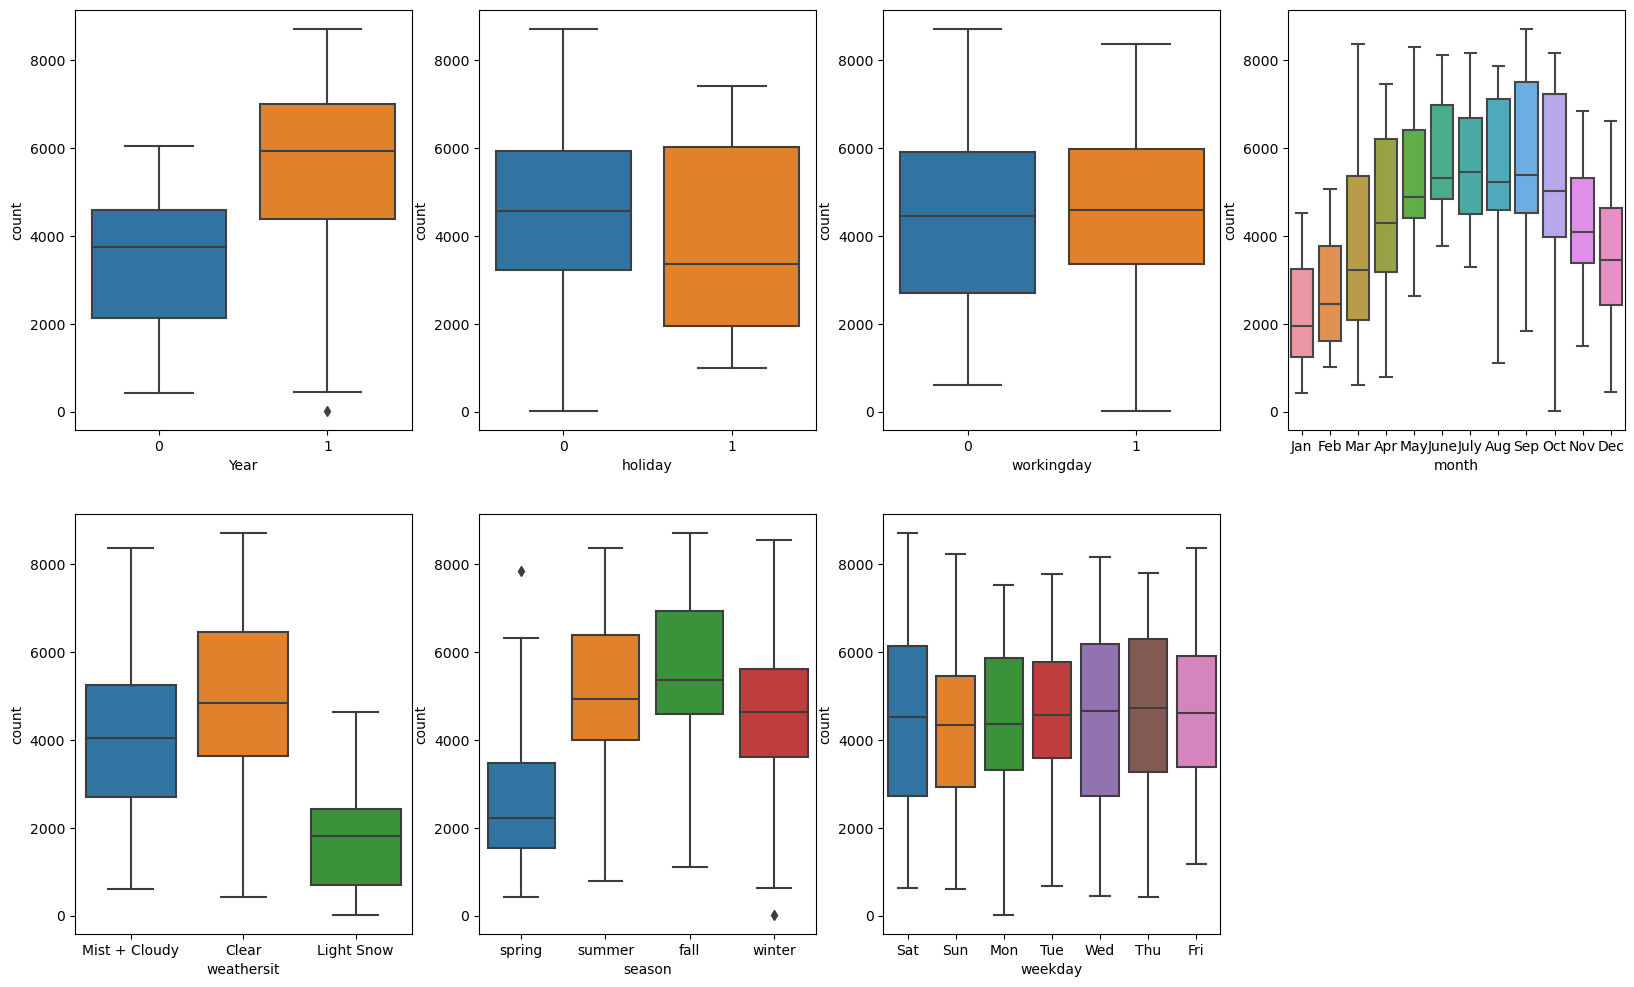

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

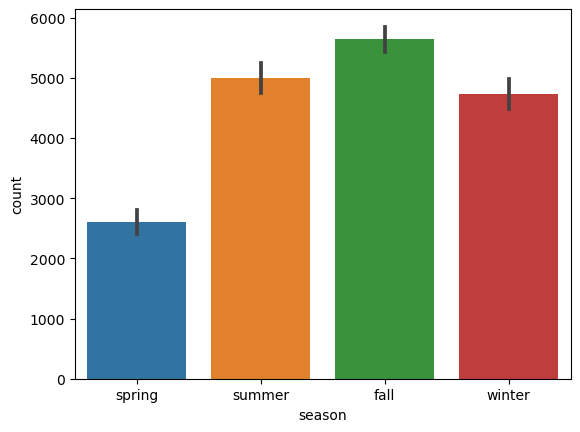

In [14]:
sns.barplot(x='season',y='count', data=bike)
plt.show()

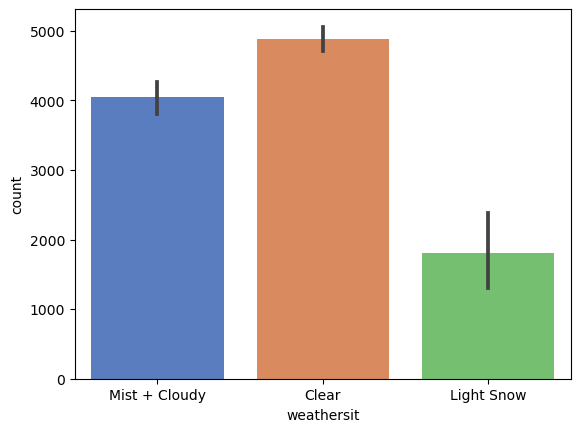

In [15]:
sns.barplot(x='weathersit',y='count',palette="muted",data=bike)
plt.show()

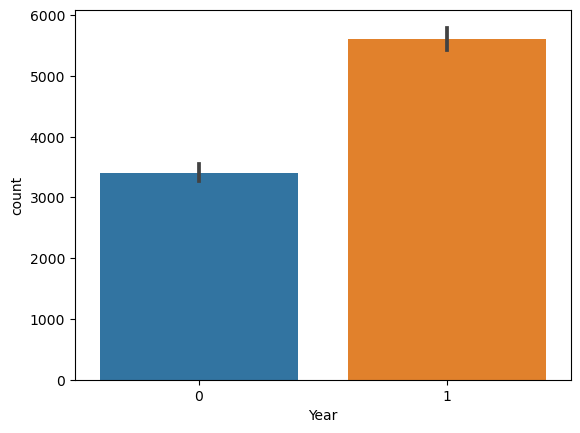

In [16]:
sns.barplot(x='Year',y='count',data=bike)
plt.show()

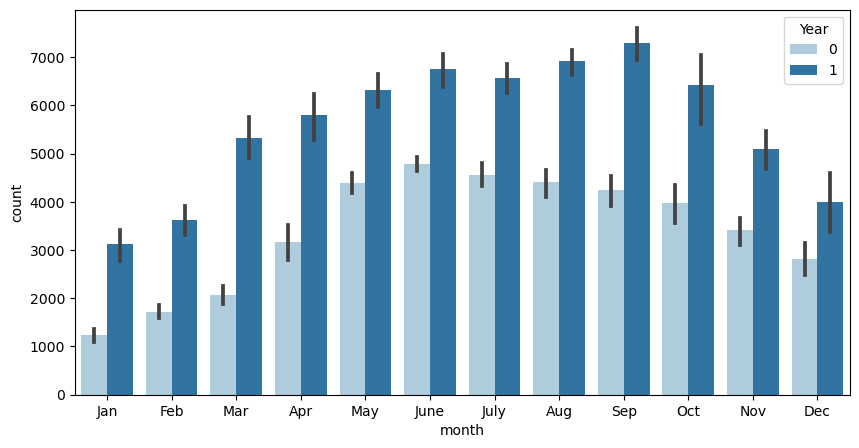

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

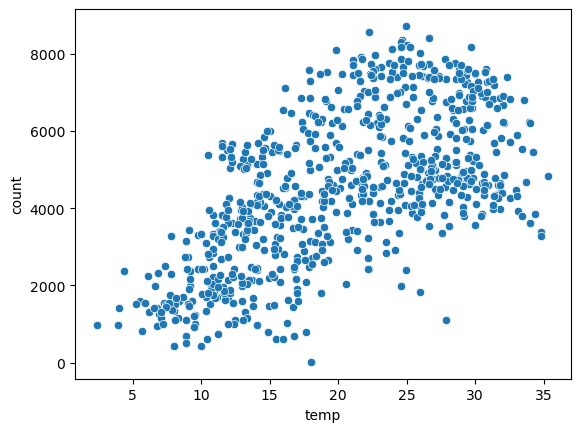

In [18]:
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

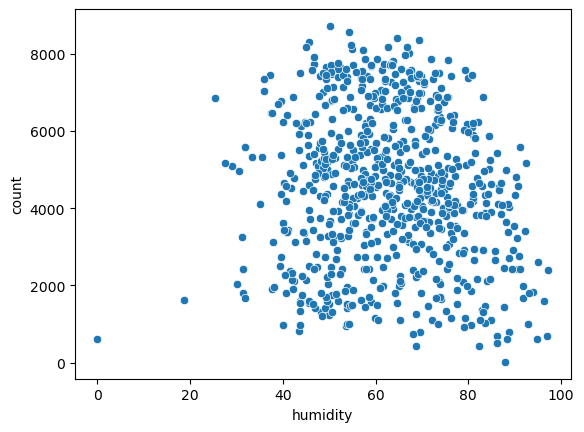

In [19]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

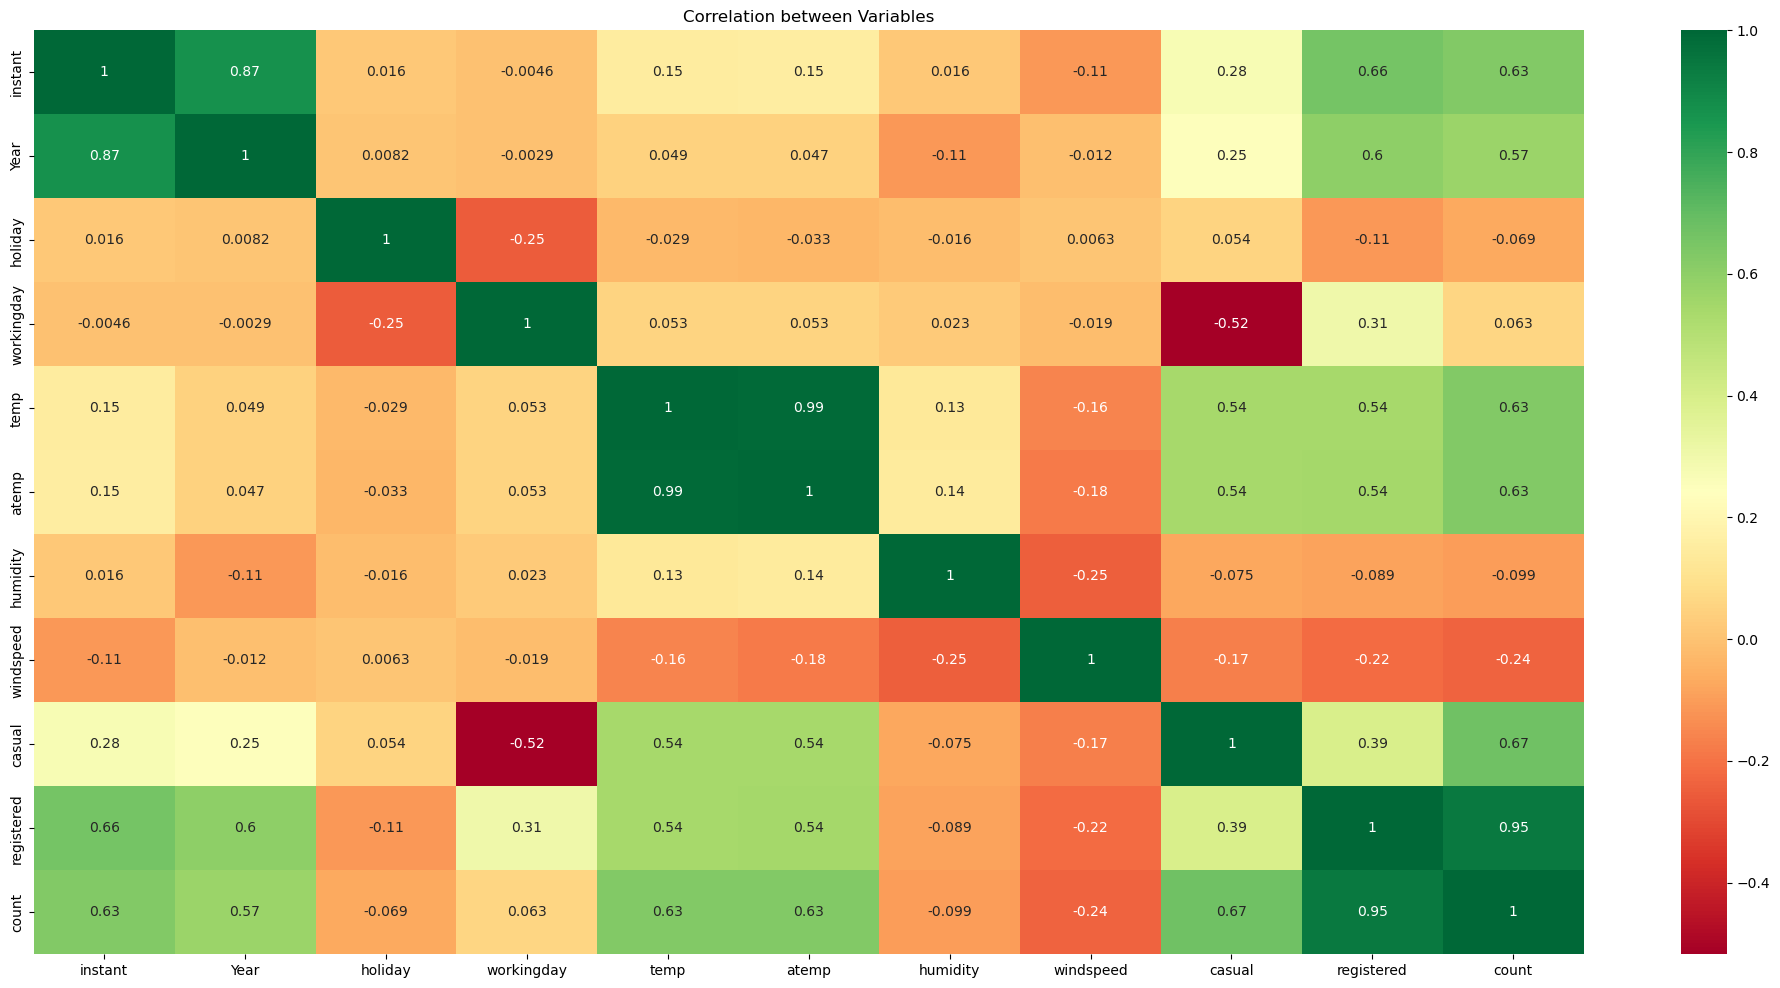

In [20]:
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [21]:
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [22]:
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## 3.Data Preparation

In [23]:
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [24]:
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [25]:
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [26]:
bike.shape

(730, 29)

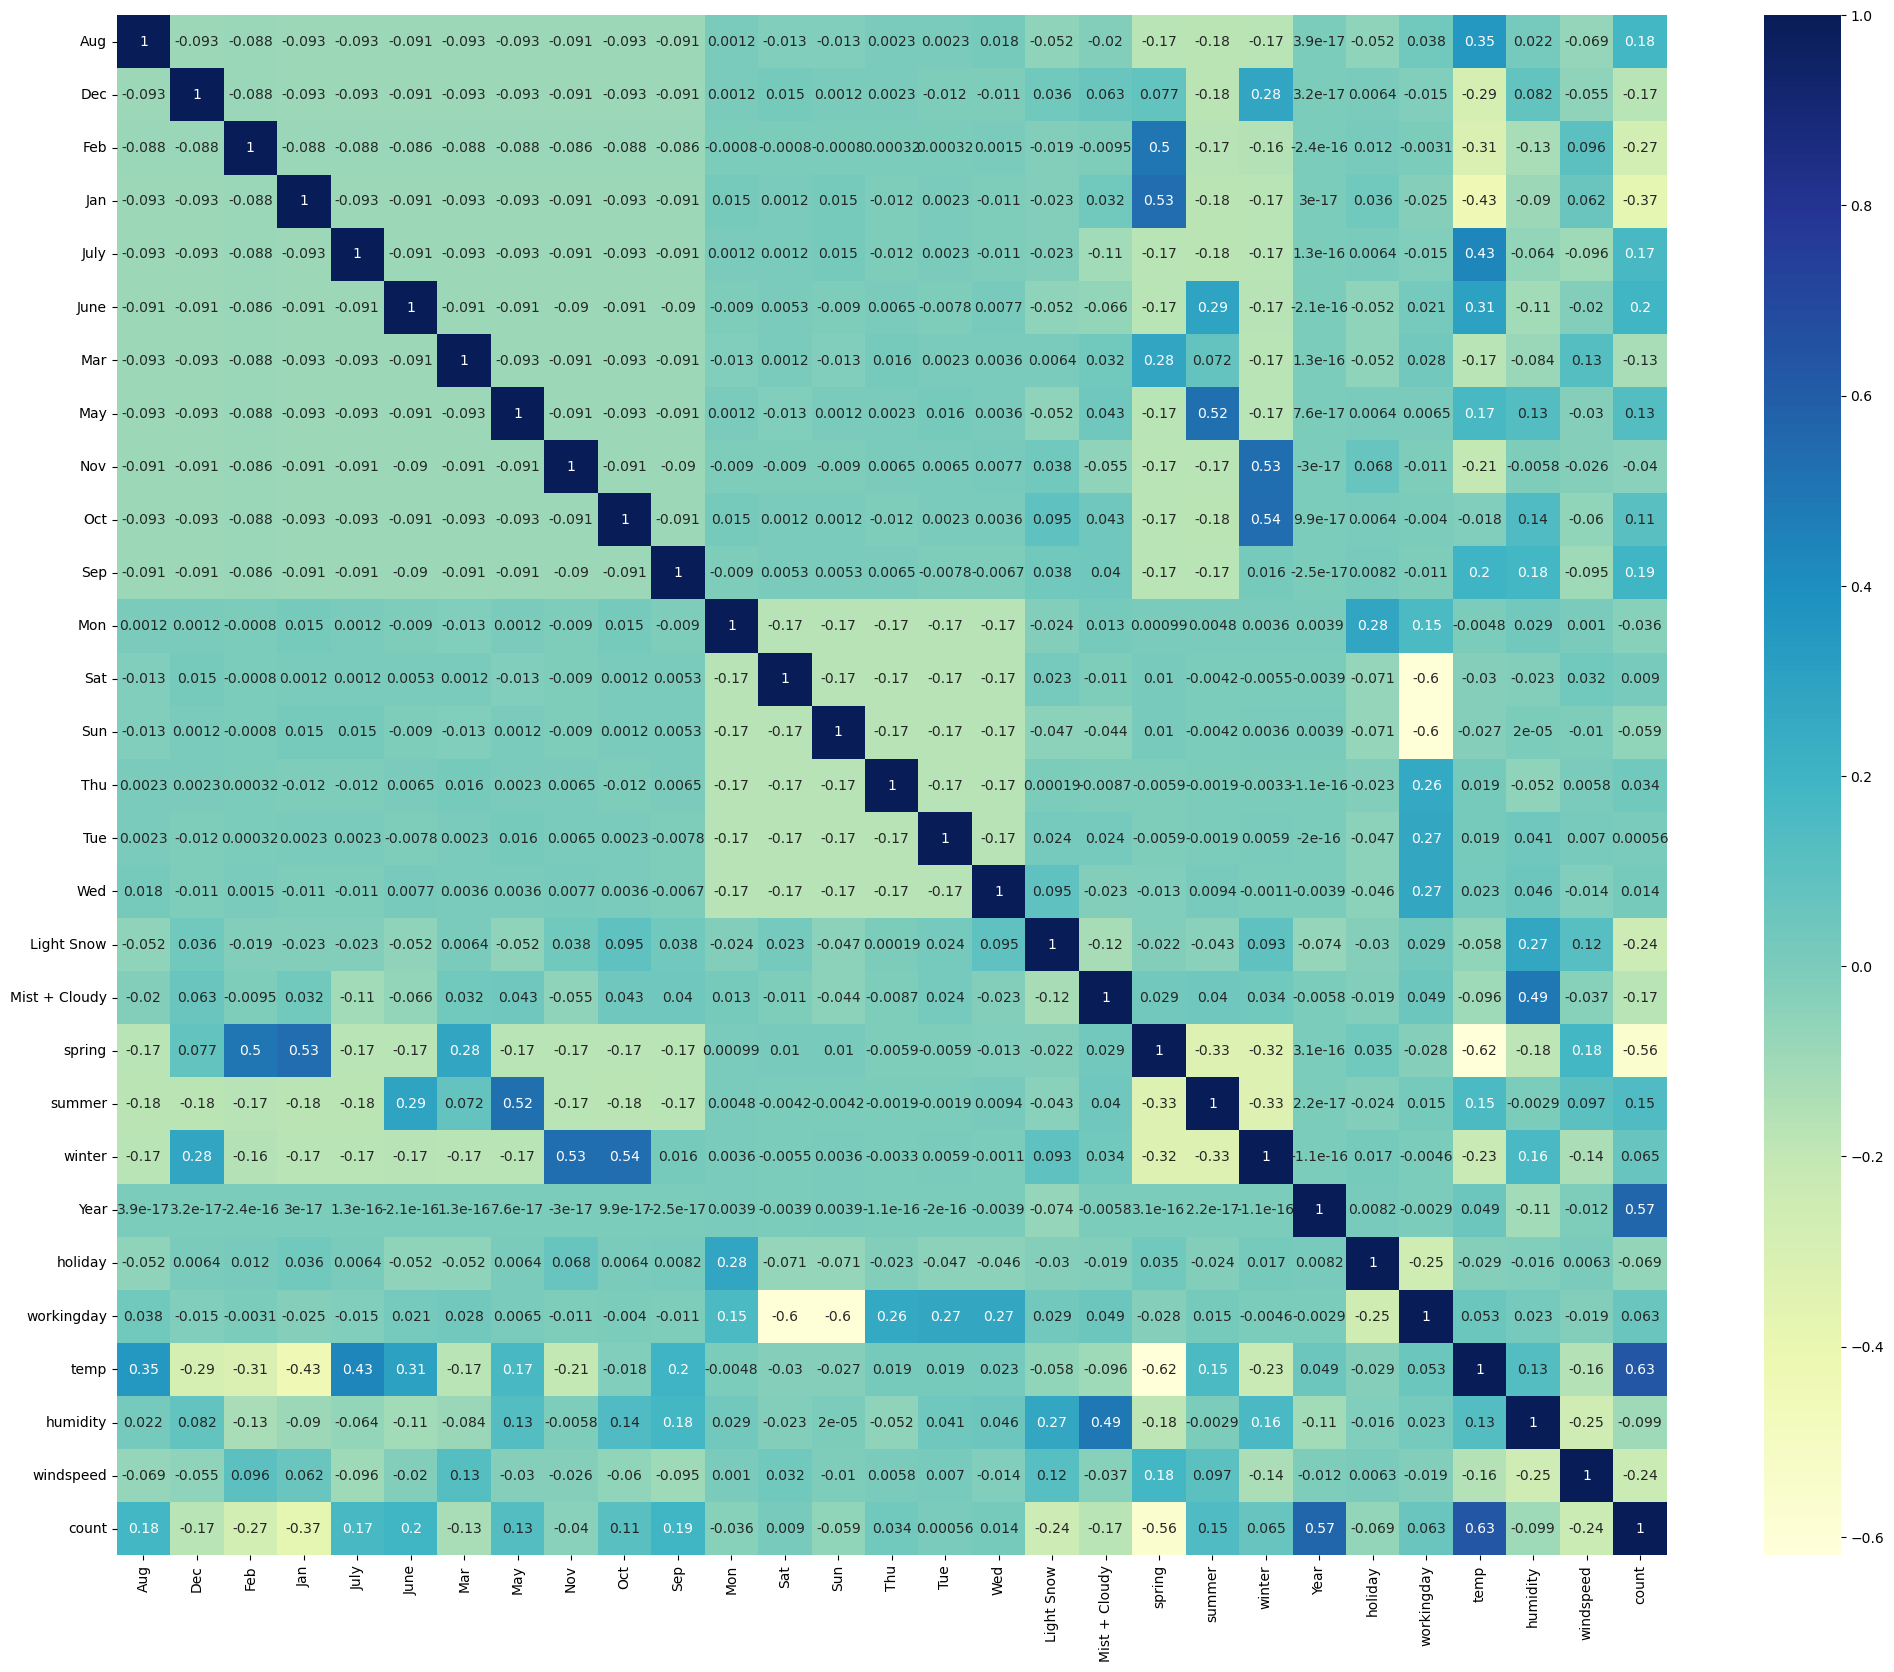

In [27]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [28]:
# splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [30]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [31]:
scaler=MinMaxScaler()

In [32]:
num_vars=['temp','humidity','windspeed','count']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [33]:
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


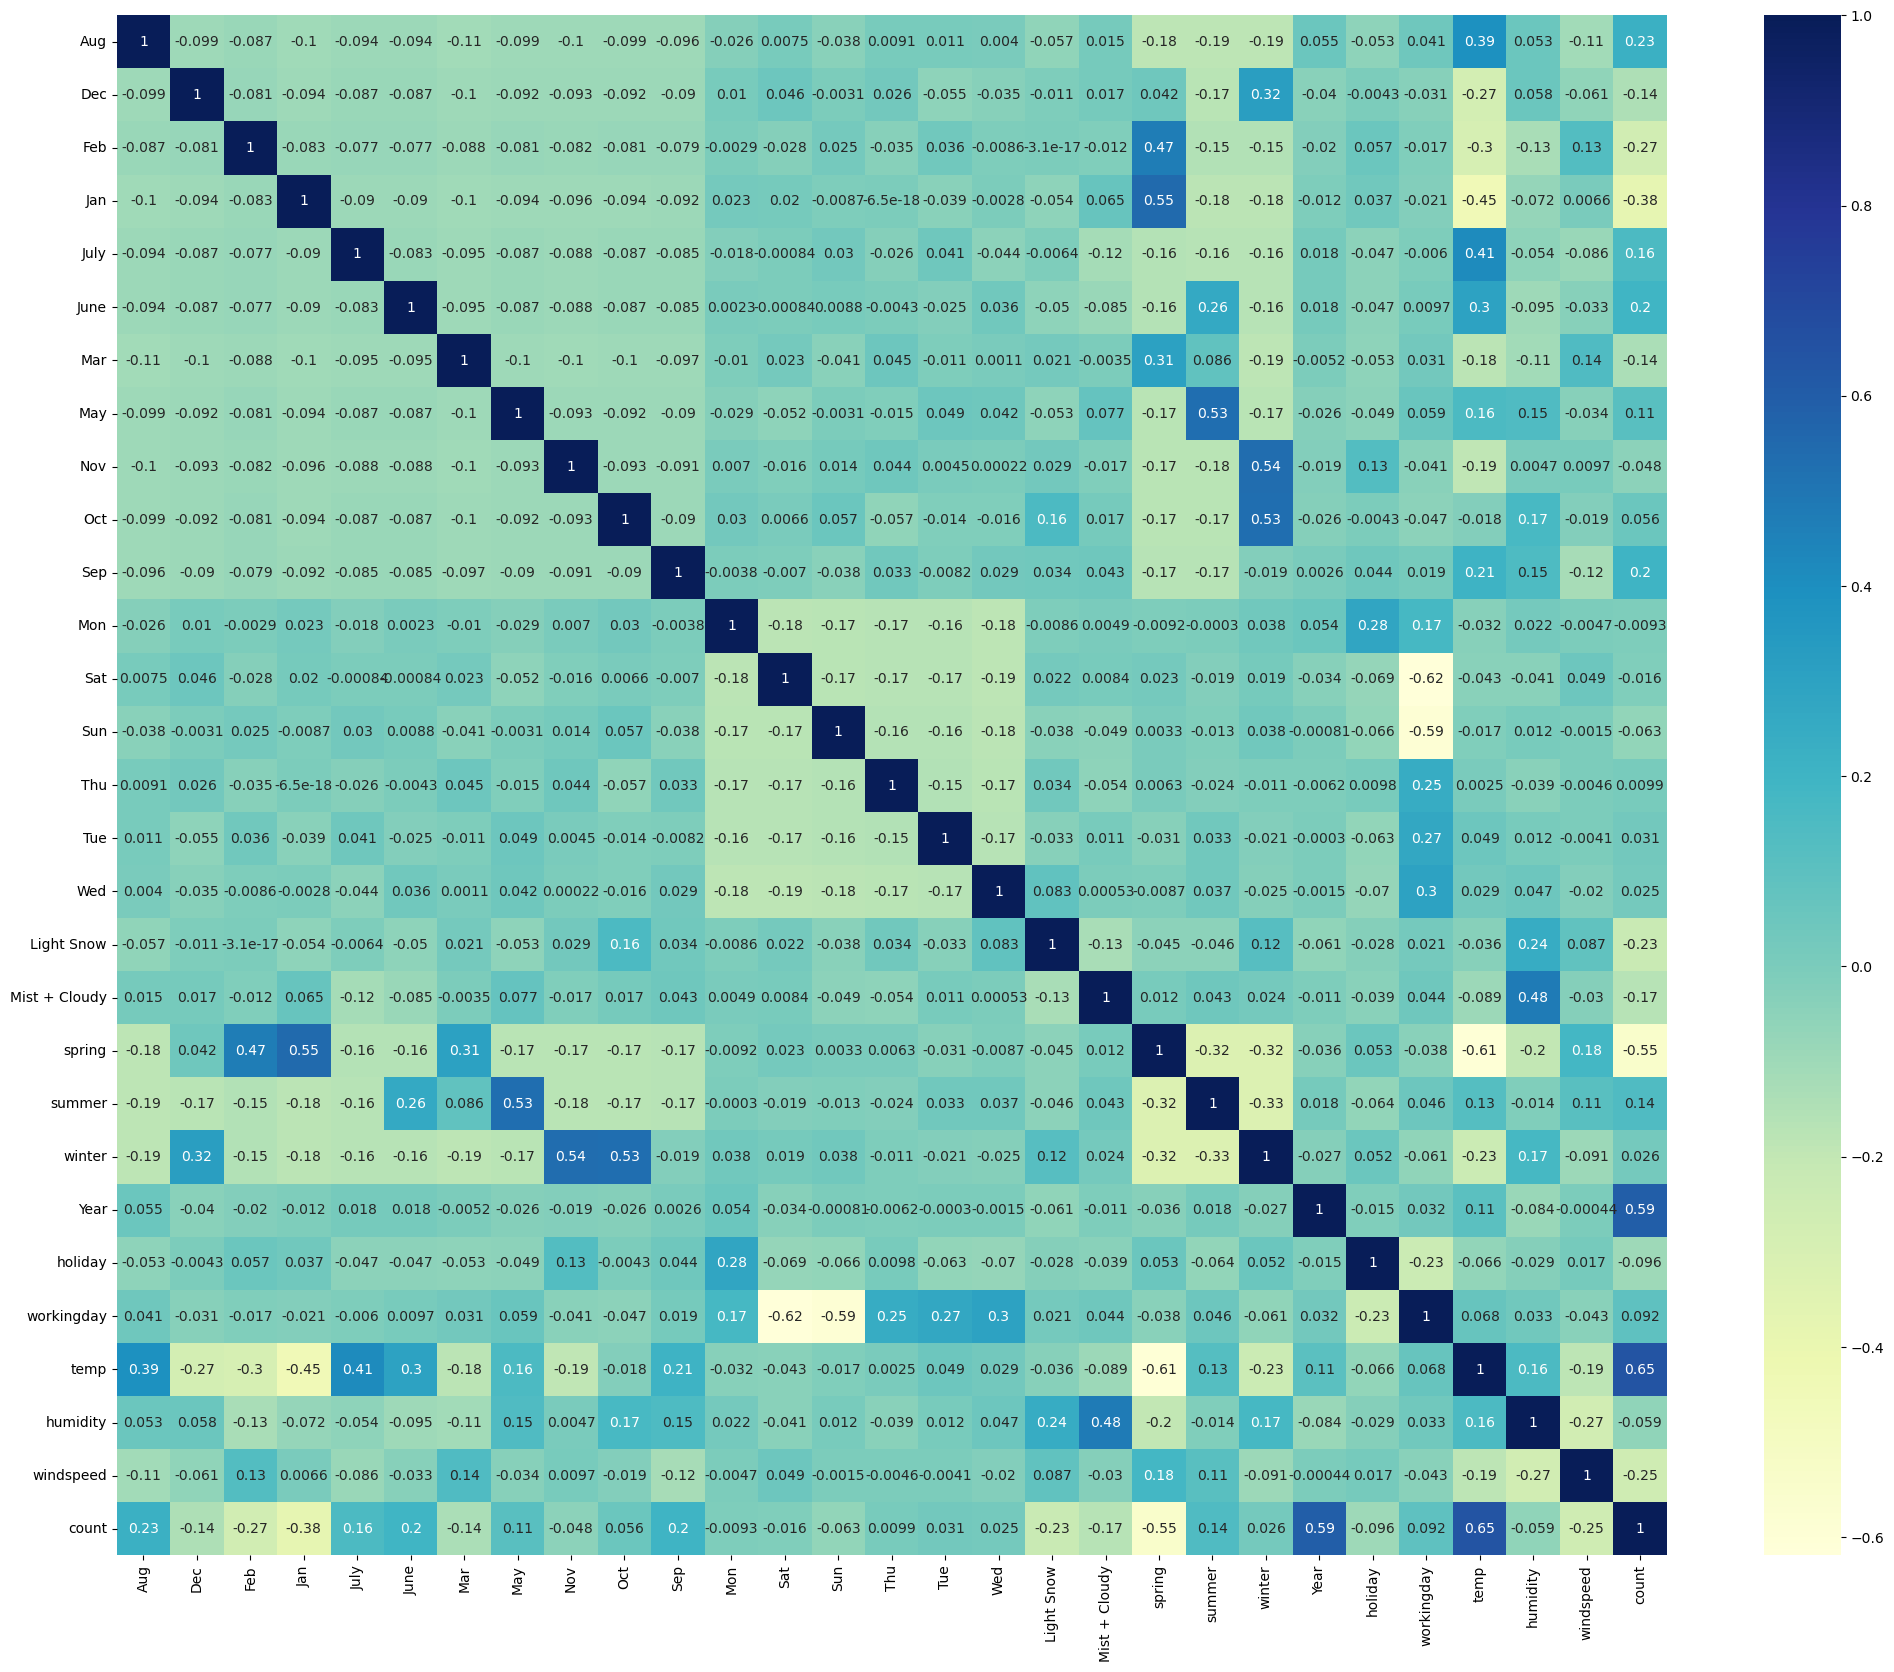

In [34]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [35]:
y_train = bike_train.pop('count')
X_train = bike_train

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)        
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]

In [40]:
col

Index(['Dec', 'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'spring', 'summer'],
      dtype='object')

In [42]:
X_train_rfe=X_train[col]

In [43]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          7.26e-179
Time:                        21:17:48   Log-Likelihood:                 485.01
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     496   BIC:                            -882.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1910      0.024      7.851      0.000       0.143       0.239
Dec              -0.0405      0.017     -2.407      0.016      -0.074      -0.007
Jan              -0.0865      0.018     -4.774      0.000      -0.122      -0.051
Sep               0.0745      0.016      4.653      0.000       0.043       0.106
Sat               0.0943      0.012      7.976      0.000       0.071       0.117
Sun               0.0377      0.012      3.048      0.002       0.013       0.062
Light Snow       -0.2599      0.028     -9.354      0.000      -0.314      -0.205
Mist + Cloudy    -0.0538      0.011     -4.873      0.000      -0.075      -0.032
winter            0.1004      0.011      8.926      0.000       0.078       0.122
Year              0.2316      0.009     27.156      0.000       0.215       0.248
holiday          -0.0257      0.022     -1.160      0.246      -0.069       0.018
workingday        0.0848      0.009      8.933      0.000       0.066       0.103
temp              0.5139      0.025     20.182      0.000       0.464       0.564
humidity         -0.1276      0.040     -3.228      0.001      -0.205      -0.050
windspeed        -0.1822      0.027     -6.735      0.000      -0.235      -0.129
==============================================================================
Omnibus:                       52.425   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.271
Skew:                          -0.601   Prob(JB):                     1.38e-23
Kurtosis:                       4.873   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,34.30
3,Sat,8.50
4,Sun,8.24
9,holiday,2.24
12,humidity,1.88
11,temp,1.87
6,Mist + Cloudy,1.56
1,Jan,1.50
7,winter,1.33
5,Light Snow,1.25


In [48]:
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [49]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.3
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          3.39e-175
Time:                        21:17:49   Log-Likelihood:                 473.56
No. Observations:                 510   AIC:                            -921.1
Df Residuals:                     497   BIC:                            -866.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1551      0.024      6.562      0.000       0.109       0.202
Dec              -0.0243      0.017     -1.446      0.149      -0.057       0.009
Sep               0.0757      0.016      4.632      0.000       0.044       0.108
Sat               0.0847      0.012      7.120      0.000       0.061       0.108
Sun               0.0301      0.013      2.405      0.017       0.006       0.055
Light Snow       -0.2517      0.028     -8.882      0.000      -0.307      -0.196
Mist + Cloudy    -0.0523      0.011     -4.639      0.000      -0.074      -0.030
winter            0.1162      0.011     10.592      0.000       0.095       0.138
Year              0.2295      0.009     26.375      0.000       0.212       0.247
holiday          -0.0362      0.023     -1.609      0.108      -0.080       0.008
workingday        0.0765      0.010      8.027      0.000       0.058       0.095
temp              0.5793      0.022     26.434      0.000       0.536       0.622
humidity         -0.1417      0.040     -3.518      0.000      -0.221      -0.063
windspeed        -0.1650      0.027     -6.023      0.000      -0.219      -0.111
==============================================================================
Omnibus:                       46.364   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.250
Skew:                          -0.537   Prob(JB):                     5.64e-21
Kurtosis:                       4.799   Cond. No.                     1.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)


In [51]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,31.02
2,Sat,7.70
3,Sun,7.56
8,holiday,2.11
11,humidity,1.87
5,Mist + Cloudy,1.56
10,temp,1.33
4,Light Snow,1.25
6,winter,1.22
0,Dec,1.19


In [52]:
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [53]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          1.04e-173
Time:                        21:17:49   Log-Likelihood:                 467.29
No. Observations:                 510   AIC:                            -910.6
Df Residuals:                     498   BIC:                            -859.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0908      0.015      5.993      0.000       0.061       0.121
Dec              -0.0288      0.017     -1.694      0.091      -0.062       0.005
Sep               0.0714      0.016      4.332      0.000       0.039       0.104
Sat               0.0710      0.011      6.243      0.000       0.049       0.093
Sun               0.0118      0.012      1.028      0.305      -0.011       0.034
Light Snow       -0.2907      0.026    -11.024      0.000      -0.342      -0.239
Mist + Cloudy    -0.0752      0.009     -8.091      0.000      -0.094      -0.057
winter            0.1098      0.011     10.033      0.000       0.088       0.131
Year              0.2327      0.009     26.587      0.000       0.215       0.250
holiday          -0.0530      0.022     -2.381      0.018      -0.097      -0.009
workingday        0.0610      0.009      7.138      0.000       0.044       0.078
temp              0.5593      0.021     26.128      0.000       0.517       0.601
windspeed        -0.1389      0.027     -5.209      0.000      -0.191      -0.087
==============================================================================
Omnibus:                       45.655   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.053
Skew:                          -0.547   Prob(JB):                     1.25e-19
Kurtosis:                       4.703   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [55]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,12.05
2,Sat,3.55
3,Sun,3.27
8,holiday,1.37
10,temp,1.24
0,Dec,1.18
6,winter,1.18
11,windspeed,1.09
1,Sep,1.07
4,Light Snow,1.06


In [56]:
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [57]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          1.04e-173
Time:                        21:17:49   Log-Likelihood:                 467.29
No. Observations:                 510   AIC:                            -910.6
Df Residuals:                     498   BIC:                            -859.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0378      0.032      1.189      0.235      -0.025       0.100
Dec              -0.0288      0.017     -1.694      0.091      -0.062       0.005
Sep               0.0714      0.016      4.332      0.000       0.039       0.104
Sat               0.1240      0.029      4.202      0.000       0.066       0.182
Sun               0.0648      0.030      2.188      0.029       0.007       0.123
Light Snow       -0.2907      0.026    -11.024      0.000      -0.342      -0.239
Mist + Cloudy    -0.0752      0.009     -8.091      0.000      -0.094      -0.057
winter            0.1098      0.011     10.033      0.000       0.088       0.131
Year              0.2327      0.009     26.587      0.000       0.215       0.250
workingday        0.1140      0.028      4.085      0.000       0.059       0.169
temp              0.5593      0.021     26.128      0.000       0.517       0.601
windspeed        -0.1389      0.027     -5.209      0.000      -0.191      -0.087
==============================================================================
Omnibus:                       45.655   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.053
Skew:                          -0.547   Prob(JB):                     1.25e-19
Kurtosis:                       4.703   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [59]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [60]:
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [61]:
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          3.64e-169
Time:                        21:17:49   Log-Likelihood:                 453.76
No. Observations:                 510   AIC:                            -885.5
Df Residuals:                     499   BIC:                            -838.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0239      0.030     -0.788      0.431      -0.083       0.036
Dec              -0.0212      0.017     -1.224      0.222      -0.055       0.013
Sep               0.0791      0.017      4.696      0.000       0.046       0.112
Sat               0.1237      0.030      4.086      0.000       0.064       0.183
Sun               0.0671      0.030      2.207      0.028       0.007       0.127
Light Snow       -0.3037      0.027    -11.277      0.000      -0.357      -0.251
Mist + Cloudy    -0.0738      0.010     -7.742      0.000      -0.093      -0.055
winter            0.1168      0.011     10.481      0.000       0.095       0.139
Year              0.2315      0.009     25.799      0.000       0.214       0.249
workingday        0.1167      0.029      4.079      0.000       0.061       0.173
temp              0.5825      0.021     27.113      0.000       0.540       0.625
==============================================================================
Omnibus:                       49.653   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.236
Skew:                          -0.567   Prob(JB):                     1.04e-22
Kurtosis:                       4.865   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [63]:
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,7.09
8,workingday,6.53
2,Sat,2.18
3,Sun,2.10
7,Year,2.04
5,Mist + Cloudy,1.57
6,winter,1.50
0,Dec,1.28
1,Sep,1.15
4,Light Snow,1.08


In [64]:
X_train_new5=X_train_lm4.drop(['Dec'], axis=1)

In [65]:
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          4.95e-170
Time:                        21:17:50   Log-Likelihood:                 453.00
No. Observations:                 510   AIC:                            -886.0
Df Residuals:                     500   BIC:                            -843.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0266      0.030     -0.882      0.378      -0.086       0.033
Sep               0.0799      0.017      4.748      0.000       0.047       0.113
Sat               0.1220      0.030      4.034      0.000       0.063       0.181
Sun               0.0662      0.030      2.178      0.030       0.006       0.126
Light Snow       -0.3018      0.027    -11.220      0.000      -0.355      -0.249
Mist + Cloudy    -0.0736      0.010     -7.720      0.000      -0.092      -0.055
winter            0.1130      0.011     10.551      0.000       0.092       0.134
Year              0.2317      0.009     25.807      0.000       0.214       0.249
workingday        0.1155      0.029      4.037      0.000       0.059       0.172
temp              0.5878      0.021     27.925      0.000       0.546       0.629
==============================================================================
Omnibus:                       48.334   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.393
Skew:                          -0.557   Prob(JB):                     7.10e-22
Kurtosis:                       4.828   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [67]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,6.84
7,workingday,6.24
1,Sat,2.10
2,Sun,2.05
6,Year,2.04
4,Mist + Cloudy,1.57
5,winter,1.37
0,Sep,1.15
3,Light Snow,1.07


In [68]:
X_train_new6=X_train_lm4.drop(['temp'], axis=1)

In [69]:
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     58.74
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.02e-72
Time:                        21:17:50   Log-Likelihood:                 222.86
No. Observations:                 510   AIC:                            -425.7
Df Residuals:                     500   BIC:                            -383.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2414      0.045      5.362      0.000       0.153       0.330
Dec              -0.1165      0.027     -4.362      0.000      -0.169      -0.064
Sep               0.1727      0.026      6.669      0.000       0.122       0.224
Sat               0.1741      0.047      3.669      0.000       0.081       0.267
Sun               0.1216      0.048      2.552      0.011       0.028       0.215
Light Snow       -0.3321      0.042     -7.856      0.000      -0.415      -0.249
Mist + Cloudy    -0.1009      0.015     -6.774      0.000      -0.130      -0.072
winter            0.0704      0.017      4.068      0.000       0.036       0.104
Year              0.2551      0.014     18.180      0.000       0.228       0.283
workingday        0.1794      0.045      4.003      0.000       0.091       0.267
==============================================================================
Omnibus:                       17.918   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.759
Skew:                          -0.450   Prob(JB):                     8.44e-05
Kurtosis:                       2.729   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train_lm5

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,winter,Year,workingday,temp
576,1.0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,1,0,0,1,0,1,0,0.442393
728,1.0,0,0,1,0,0,0,1,0,0.245101
482,1.0,0,1,0,0,1,0,1,0,0.395666
111,1.0,0,0,0,0,1,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,0,0,0,1,0.202618
350,1.0,0,1,0,0,1,1,0,0,0.248216
79,1.0,0,0,0,0,1,0,0,1,0.462664


In [71]:
y_train_pred =lm5.predict(X_train_lm5)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

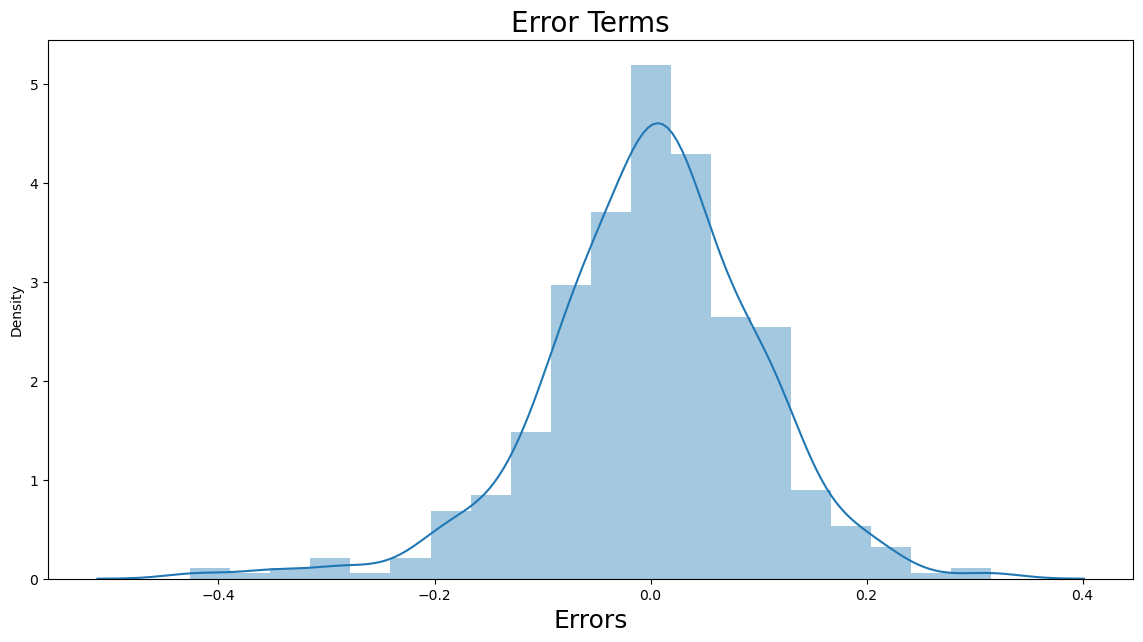

In [73]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)         
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [74]:
num_vars=['temp','humidity','windspeed','count']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [75]:
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [76]:
X_train_new5.columns

Index(['Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'winter', 'Year',
       'workingday', 'temp'],
      dtype='object')

In [77]:
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,winter,Year,workingday,temp
184,1.0,0,0,0,0,1,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,1,0.901354
299,1.0,0,0,0,0,1,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,0,0,1,0.817246


In [78]:
y_pred = lm5.predict(X_test_new1)

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

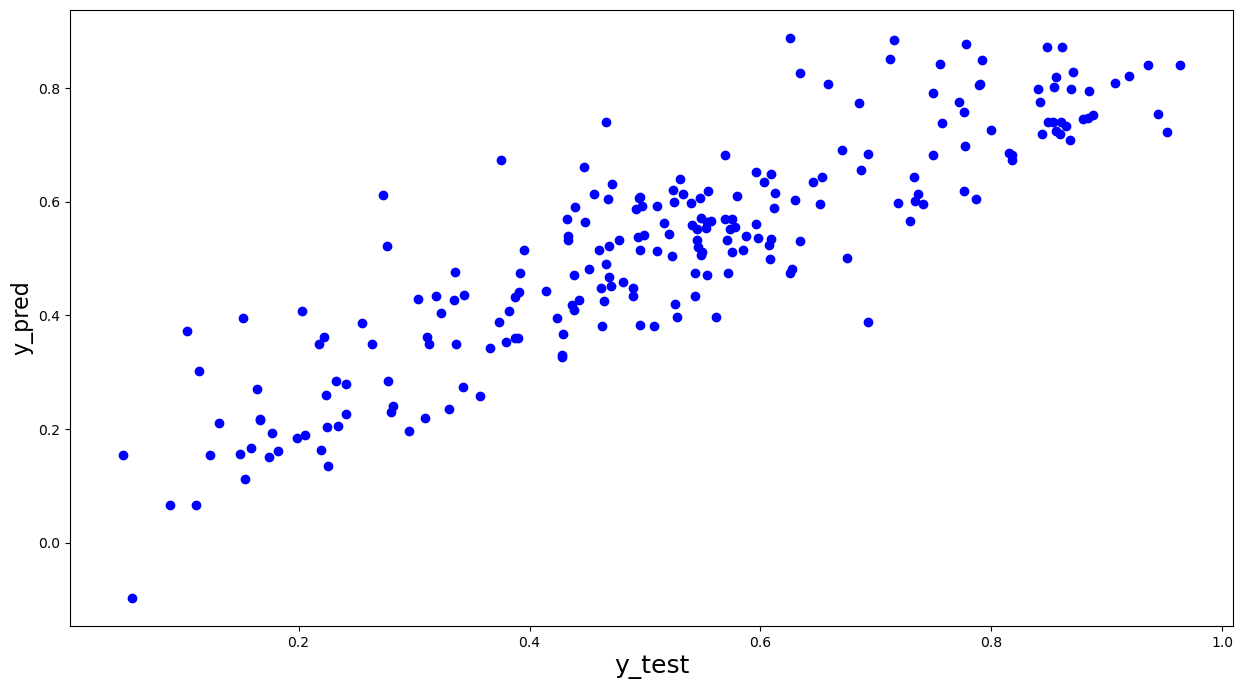

In [79]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)     
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          


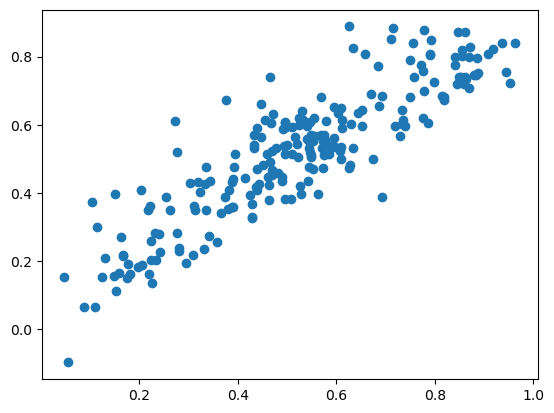

In [80]:
plt.figure()
plt.scatter(y_test,y_pred)